In [1]:
%matplotlib notebook

In [269]:
import numpy as np
from matplotlib import pyplot
import astropy.constants

In [270]:
def magnitude(vector):
    return np.sqrt(vector[0] ** 2.0 + vector[1] ** 2.0 + vector[2] ** 2.0)

In [271]:
class Particle(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position = np.zeros((number_time_steps, 3))
        self.position[0] = initial_position
        self.velocity =  np.zeros((number_time_steps, 3))
        self.velocity[0] = initial_velocity
        self.acceleration = np.zeros((number_time_steps, 3))
        self.mass = mass
        self.speed = np.zeros((number_time_steps, 1))
        self.speed[0] = magnitude(initial_velocity)
        
    def update_position(self, t):
        self.position[t] = self.position[t - 1]
        self.position[t] += self.velocity[t - 1] * delta_t
        self.position[t] += 0.5 * self.acceleration[t - 1] * delta_t * delta_t
    
    def update_velocity(self, t):
        self.velocity[t] = self.velocity[t - 1]
        self.velocity[t] += 0.5 * delta_t * (self.acceleration[t] + self.acceleration[t - 1])
    
    def update_acceleration(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.acceleration[t] += G * np.asarray(particle.mass) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position1, t):
        return self.position[t] - position1[t]
                
    def update_speed(self, t):
        self.speed[t] = magnitude(self.velocity[t])

Distances in Au, Speeds in Au/day, Times in days

In [584]:
number_of_time_steps = 3000
delta_t = 0.001
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value

In [585]:
mass_sun = 332946.0487

X_sun = 0.0
Y_sun = 0.0
Z_sun = 0.0

Xdot_sun = 0.0
Ydot_sun = 0.0
Zdot_sun = 0.0

In [586]:
mass_earth = 1.0

X_earth = 0.003545
Y_earth = 0.0
Z_earth = 0.0

Xdot_earth = 0.0
Ydot_earth = 2.0 * np.pi / np.sqrt(X_earth) / 365.25
Zdot_earth = 0.0

In [587]:
sun = Particle([X_sun, Y_sun, Z_sun], [Xdot_sun, Ydot_sun, Zdot_sun], mass_sun, number_of_time_steps)

earth = Particle([X_earth, Y_earth, Z_earth], [Xdot_earth, Ydot_earth, Zdot_earth], mass_earth, number_of_time_steps)

particles = [sun, earth]

In [588]:
for particle in particles:
    particle.update_acceleration(0, particles)

In [589]:
for t in np.arange(1, number_of_time_steps):
    for particle in particles:
        particle.update_position(t)
    for particle in particles:
        particle.update_acceleration(t, particles)
    for particle in particles:
        particle.update_velocity(t)
    for particle in particles:
        particle.update_speed(t)

In [590]:
time = np.arange(0, number_of_time_steps, 1)

<IPython.core.display.Javascript object>


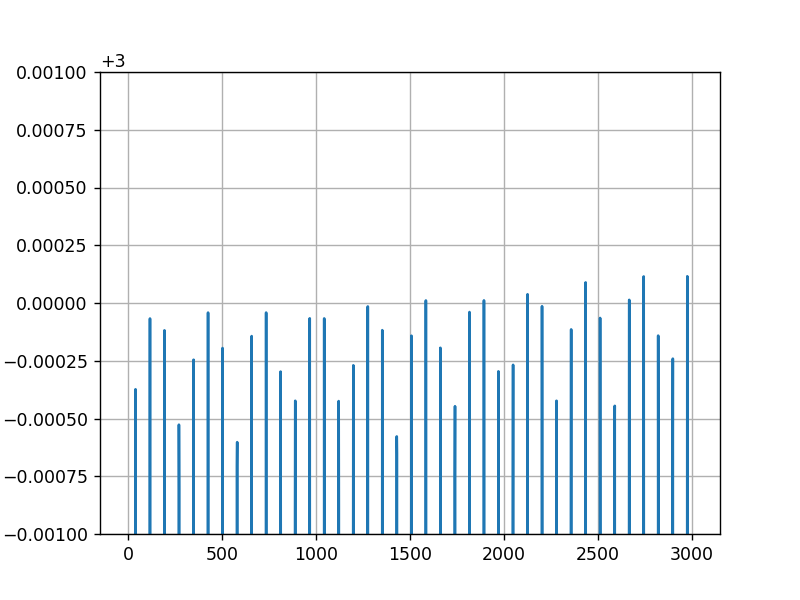

In [592]:
pyplot.plot(time, sun.speed * 1731456.837)
#1731456.837 is the conversion factor from AU/day to m/s
pyplot.ylabel("Speed, m/s")
pyplot.ylim(2.999, 3.001)
pyplot.grid(b=bool)

When the Earth is about 0.003545 AU from the Sun, it is detectable by LCO's NRES device.

In [593]:
class Particle0(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position0 = np.zeros((number_time_steps, 3))
        self.position0[0] = initial_position
        self.velocity0 =  np.zeros((number_time_steps, 3))
        self.velocity0[0] = initial_velocity
        self.acceleration0 = np.zeros((number_time_steps, 3))
        self.mass0 = mass
        self.speed0 = np.zeros((number_time_steps, 1))
        self.speed0[0] = magnitude(initial_velocity)
        
    def update_position0(self, t):
        self.position0[t] = self.position0[t - 1]
        self.position0[t] += self.velocity0[t - 1] * delta_t0
        self.position0[t] += 0.5 * self.acceleration0[t - 1] * delta_t0 * delta_t0
    
    def update_velocity0(self, t):
        self.velocity0[t] = self.velocity0[t - 1]
        self.velocity0[t] += 0.5 * delta_t0 * (self.acceleration0[t] + self.acceleration0[t - 1])
    
    def update_acceleration0(self, t, particles0):
        for particle0 in particles0:
            if particle0 != self:
                r12 = particle0.vector_to(self.position0, t)
                self.acceleration0[t] += G * np.asarray(particle0.mass0) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position10, t):
        return self.position0[t] - position10[t]
                
    def update_speed0(self, t):
        self.speed0[t] = magnitude(self.velocity0[t])

In [681]:
number_of_time_steps0 = 2000000
delta_t0 = 7
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value

In [682]:
mass_sun0 = 332946.0487

X_sun0 = 0.0
Y_sun0 = 0.0
Z_sun0 = 0.0

Xdot_sun0 = 0.0
Ydot_sun0 = 0.0
Zdot_sun0 = 0.0

In [683]:
mass_jup = 317.83

X_jup = 360.0
Y_jup = 0.0
Z_jup = 0.0

Xdot_jup = 0.0
Ydot_jup = 2.0 * np.pi / np.sqrt(X_jup) / 365.25
Zdot_jup = 0.0

In [684]:
sun0 = Particle0([X_sun0, Y_sun0, Z_sun0], [Xdot_sun0, Ydot_sun0, Zdot_sun0], mass_sun0, number_of_time_steps0)

jupiter0 = Particle0([X_jup, Y_jup, Z_jup], [Xdot_jup, Ydot_jup, Zdot_jup], mass_jup, number_of_time_steps0)

particles0 = [sun0, jupiter0]

In [685]:
time0 = np.arange(0, number_of_time_steps0, 1)

In [686]:
for particle0 in particles0:
    particle0.update_acceleration0(0, particles0)

In [687]:
for t in np.arange(1, number_of_time_steps0):
    for particle0 in particles0:
        particle0.update_position0(t)
    for particle0 in particles0:
        particle0.update_acceleration0(t, particles0)
    for particle0 in particles0:
        particle0.update_velocity0(t)
    for particle0 in particles0:
        particle0.update_speed0(t)

<IPython.core.display.Javascript object>


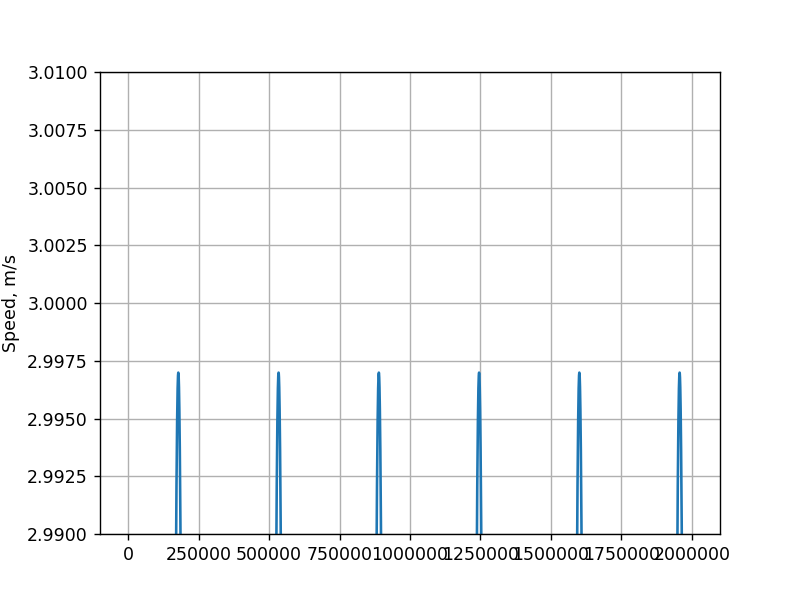

In [688]:
pyplot.plot(time0, sun0.speed0 * 1731456.837)
#1731456.837 is the conversion factor from AU/day to m/s
pyplot.ylabel("Speed, m/s")
pyplot.ylim(2.99, 3.01)
pyplot.grid(b=bool)

The farthest Jupiter can be from the Sun to be detected by LCO's NRES is about 360 AU.